# **Tugas 5 - K-MEANS Clusterring**

**Metode Clustering** adalah mengelompokkan beberapa data ke dalam kelompok yang menjelaskan data dalam satu kelompok memiliki karakteristik yang sama dan memiliki karakteristik yang berbeda dengan data yang ada di kelompok lain.

In [367]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#the imported dataset does not have the required column names so lets add it
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width','Class']
irisdata = pd.read_csv(url, names=colnames)

In [368]:
irisdata.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [369]:
irisdata['Class'] = pd.Categorical(irisdata["Class"]) #Mengambil class dari nilai categorical yang terdapat pada data iris
irisdata["Class"] = irisdata["Class"].cat.codes 
# irisdata['Class']

In [370]:
X = irisdata.values[:, 0:4] #define var X for fitur
y = irisdata.values[:, 4] #define var y for label

In [371]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() #untuk merubah data kategori ke numerik dengan berurutan

In [372]:
y_true = le.fit_transform(y)
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [373]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3, random_state=10)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [374]:
centroids

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [375]:
from sklearn.metrics import classification_report

target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

print(classification_report(irisdata['Class'],kmeans.labels_,target_names=target_names))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.77      0.96      0.86        50
 Iris-virginica       0.95      0.72      0.82        50

       accuracy                           0.89       150
      macro avg       0.91      0.89      0.89       150
   weighted avg       0.91      0.89      0.89       150



In [376]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [377]:
a = labels
mapping = {1:0, 0:1,  2:2}
a= [mapping[i] for i in a] #menjadikan list 1 dimensi

In [378]:
y = np.array(a)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [379]:
type(a)

list

### **Visualisasi clustering**

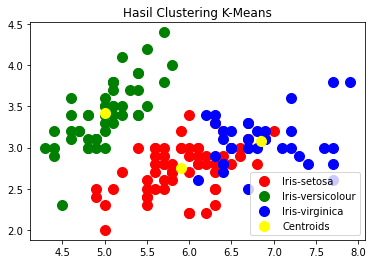

In [380]:
#Visualising the clusters
plt.title("Hasil Clustering K-Means")
plt.scatter(X[y == 0, 0], X[y == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s = 100, c = 'blue', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [381]:
from sklearn.metrics import accuracy_score #cek akurasi
accuracy_score(y, y_true)

0.24